Exponente de la ley de potencias (alpha): 1.578


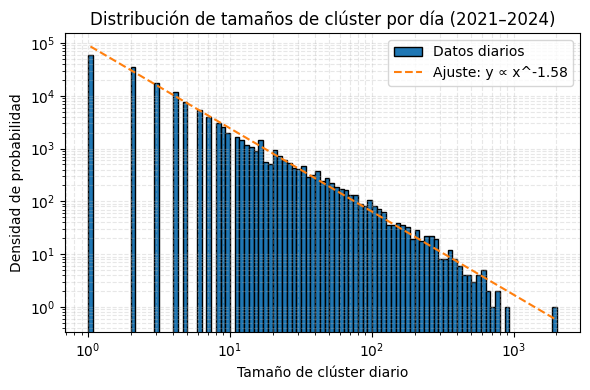

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Parámetros DBSCAN (haversine)
kms_per_radian = 6371.0088
epsilon_km = 10        # radio máximo en km
epsilon = epsilon_km / kms_per_radian
min_samples = 1       # mínimo de puntos para formar un cluster

# 1) Leer y concatenar todos los CSV, parseando la fecha
filepaths = ['modis_2020_Australia.csv', 'modis_2021_Australia.csv', 'modis_2022_Australia.csv', 'modis_2023_Australia.csv']
df_list = [pd.read_csv(fp, parse_dates=['acq_date']) for fp in filepaths]
df_all = pd.concat(df_list, ignore_index=True)

# 2) Para cada día: calcular clusters y acumular tamaños
all_cluster_sizes = []
for date, group in df_all.groupby(df_all['acq_date'].dt.date):
    # convertir a radianes
    coords = np.radians(group[['latitude','longitude']].values)
    # ejecutar DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')
    labels = db.fit_predict(coords)
    # contar puntos por cluster (descartar ruido = -1)
    counts = pd.Series(labels).value_counts()
    if -1 in counts:
        counts = counts.drop(-1)
    all_cluster_sizes.extend(counts.values)

# 3) Filtrar ceros
all_cluster_sizes = [c for c in all_cluster_sizes if c > 0]

# 4) Crear bins logarítmicos
min_c, max_c = min(all_cluster_sizes), max(all_cluster_sizes)
bins = np.logspace(np.log10(min_c), np.log10(max_c), 100)

# 5) Calcular histograma normalizado y preparar ajuste
counts, bin_edges = np.histogram(all_cluster_sizes, bins=bins)
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
mask = counts > 0
x, y = bin_centers[mask], counts[mask]

# 6) Ajuste de ley de potencias (lineal en log–log)
slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
alpha = -slope
print(f"Exponente de la ley de potencias (alpha): {alpha:.3f}")

# 7) Graficar histograma + ajuste en escala log–log
plt.figure(figsize=(6,4))
plt.hist(all_cluster_sizes, bins=bins, edgecolor='black', label='Datos diarios')
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = np.exp(intercept) * x_fit**slope
plt.plot(x_fit, y_fit, '--', label=f'Ajuste: y ∝ x^{slope:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de clúster diario')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de tamaños de clúster por día (2021–2024)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

91666.32667572636
-1.5778891736216163
Exponente de la ley de potencias (alpha): 1.578


/tmp/ipython-input-4-2760538436.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


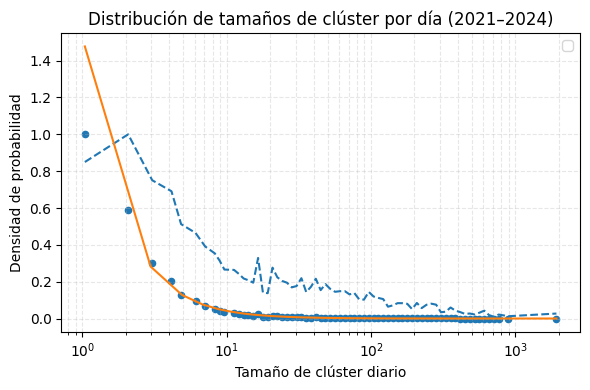

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Parámetros DBSCAN (haversine)
kms_per_radian = 6371.0088
epsilon_km = 10        # radio máximo en km
epsilon = epsilon_km / kms_per_radian
min_samples = 1       # mínimo de puntos para formar un cluster

# 1) Leer y concatenar todos los CSV, parseando la fecha
filepaths = ['modis_2020_Australia.csv', 'modis_2021_Australia.csv', 'modis_2022_Australia.csv', 'modis_2023_Australia.csv']
df_list = [pd.read_csv(fp, parse_dates=['acq_date']) for fp in filepaths]
df_all = pd.concat(df_list, ignore_index=True)

# 2) Para cada día: calcular clusters y acumular tamaños
all_cluster_sizes = []
for date, group in df_all.groupby(df_all['acq_date'].dt.date):
    # convertir a radianes
    coords = np.radians(group[['latitude','longitude']].values)
    # ejecutar DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')
    labels = db.fit_predict(coords)
    # contar puntos por cluster (descartar ruido = -1)
    counts = pd.Series(labels).value_counts()
    if -1 in counts:
        counts = counts.drop(-1)
    all_cluster_sizes.extend(counts.values)

# 3) Filtrar ceros
all_cluster_sizes = [c for c in all_cluster_sizes if c > 0]

# 4) Crear bins logarítmicos
min_c, max_c = min(all_cluster_sizes), max(all_cluster_sizes)
bins = np.logspace(np.log10(min_c), np.log10(max_c), 100)

# 5) Calcular histograma normalizado y preparar ajuste
counts, bin_edges = np.histogram(all_cluster_sizes, bins=bins)
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
mask = counts > 0
x, y = bin_centers[mask], counts[mask]
# 6) Ajuste de ley de potencias (lineal en log–log)
slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
alpha = -slope
print(np.exp(intercept))
print(slope)
print(f"Exponente de la ley de potencias (alpha): {alpha:.3f}")
risk = x/max(x)*y/max(y)
risk_norm = risk / risk.max()

# 7) Graficar histograma + ajuste en escala log–log
plt.figure(figsize=(6,4))
plt.scatter(x,y/max(y),20)
plt.plot(x,risk_norm,'--')
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = np.exp(intercept) * x_fit**slope/max(counts)
plt.plot(x_fit, y_fit)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Tamaño de clúster diario')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de tamaños de clúster por día (2021–2024)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Exponente de la ley de potencias (alpha): 1.578


/tmp/ipython-input-5-645353821.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x,y/max(y),5,c=[0.2,0.2,0.2])


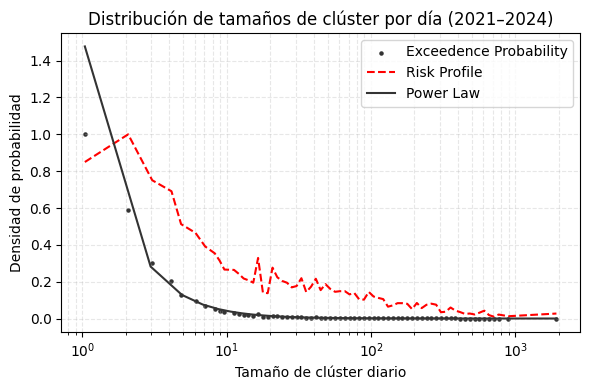

In [5]:
# 6) Ajuste de ley de potencias (lineal en log–log)
slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
alpha = -slope
print(f"Exponente de la ley de potencias (alpha): {alpha:.3f}")
risk = x/max(x)*y/max(y)
risk_norm = risk / risk.max()

# 7) Graficar histograma + ajuste en escala log–log
plt.figure(figsize=(6,4))
plt.scatter(x,y/max(y),5,c=[0.2,0.2,0.2])
plt.plot(x,risk_norm,'r--')
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = np.exp(intercept) * x_fit**slope/max(counts)
plt.plot(x_fit, y_fit,c=[0.2,0.2,0.2])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Tamaño de clúster diario')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de tamaños de clúster por día (2021–2024)')
plt.legend(['Exceedence Probability','Risk Profile','Power Law'])
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-6-2551056633.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y/ y.max(), s=5, c=[0.2,0.2,0.2], label='Exceedence Probability')


-1.5778891736216163
0.022587639480892395


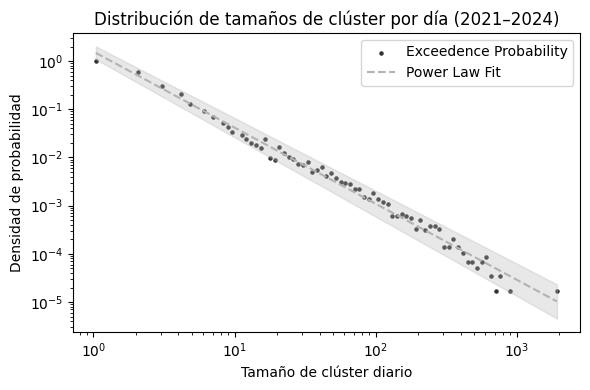

In [6]:
# 6) Ajuste de ley de potencias (lineal en log–log) con covarianza
(log_slope, log_intercept), cov = np.polyfit(np.log(x), np.log(y), 1, cov=True)
slope  = log_slope
intercept = log_intercept

# Desviaciones estándar de los parámetros
sigma_slope, sigma_intercept = np.sqrt(np.diag(cov))

# 7) Graficar histograma + ajuste en escala log–log con bandas
plt.figure(figsize=(6,4))
plt.scatter(x, y/ y.max(), s=5, c=[0.2,0.2,0.2], label='Exceedence Probability')

# Generar rango para el ajuste
x_fit = np.logspace(np.log10(x.min()), np.log10(x.max()), 1000)

# Ajuste central
y_fit     = np.exp(intercept) * x_fit**slope / y.max()
print(slope)
print(sigma_slope)
# Ajustes en los parámetros superior e inferior
# (usamos +1σ y −1σ en slope e intercept)
y_fit_hi  = np.exp(intercept + 3*sigma_intercept) * x_fit**(slope + 3*sigma_slope) / y.max()
y_fit_lo  = np.exp(intercept - 3*sigma_intercept) * x_fit**(slope - 3*sigma_slope) / y.max()

# Dibujar la línea de ajuste y el área sombreada
plt.plot(x_fit, y_fit, '--', c=[0.7,0.7,0.7], label='Power Law Fit')
plt.fill_between(x_fit, y_fit_lo, y_fit_hi,
                 color=[0.7,0.7,0.7], alpha=0.3)

# Escalas logarítmicas y etiquetas
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de clúster diario')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de tamaños de clúster por día (2021–2024)')
plt.legend()
plt.tight_layout()
plt.show()

Exponente de la ley de potencias (alpha): 1.578


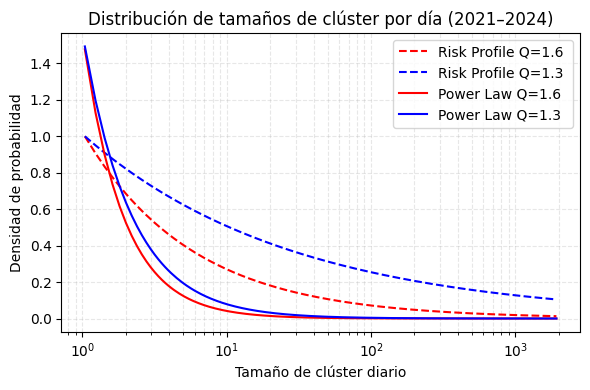

In [20]:
# 6) Ajuste de ley de potencias (lineal en log–log)
slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
alpha = -slope
print(f"Exponente de la ley de potencias (alpha): {alpha:.3f}")

# 7) Graficar histograma + ajuste en escala log–log
plt.figure(figsize=(6,4))

x_fit = np.linspace(min(x), max(x), 10000)
y_fit = np.exp(intercept) * x_fit**slope/max(counts)
y_fit2 = np.exp(intercept) * x_fit**(-1.3)/max(counts)
risk = x_fit/max(x_fit)*y_fit/max(y_fit)
risk_norm= risk / risk.max()
risk2 = x_fit/max(x_fit)*y_fit2/max(y_fit2)
risk_norm2= risk2 / risk2.max()
plt.plot(x_fit,risk_norm,'r--')
plt.plot(x_fit,risk_norm2,'b--')
plt.plot(x_fit, y_fit,'r')
plt.plot(x_fit, y_fit2,'b')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Tamaño de clúster diario')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de tamaños de clúster por día (2021–2024)')
plt.legend(['Risk Profile Q=1.6 ','Risk Profile Q=1.3','Power Law Q=1.6','Power Law Q=1.3'])
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()